<a href="https://colab.research.google.com/github/cluePrints/fastai-v3-notes/blob/master/fast_ai3_lesson_3_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import tensorflow as tf
device = tf.test.gpu_device_name()
assert 'GPU' in device, "Expected device ({device}) to be GPU. Please follow Runtime > Change runtime type > GPU".format(device=device)

In [3]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    210      0  0:00:01  0:00:01 --:--:--   210
Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


In [4]:
!pip freeze

absl-py==0.7.0
alabaster==0.7.12
albumentations==0.1.11
altair==2.3.0
astor==0.7.1
astropy==3.0.5
atari-py==0.1.7
atomicwrites==1.2.1
attrs==18.2.0
audioread==2.1.6
autograd==1.2
Babel==2.6.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
boto3==1.9.86
botocore==1.12.86
Bottleneck==1.2.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.0
certifi==2018.11.29
cffi==1.11.5
chainer==5.0.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cupy-cuda92==5.0.0
cvxopt==1.2.2
cvxpy==1.0.14
cycler==0.10.0
cymem==2.0.2
Cython==0.29.3
cytoolz==0.9.0.1
daft==0.0.4
dask==0.20.2
dataclasses==0.6
datascience==0.10.6
decorator==4.3.2
defusedxml==0.5.0
dill==0.2.9
distributed==1.25.2
Django==2.1.5
dlib==19.16.0
dm-sonnet==1.23
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easydict==1.9
ecos==2.0.7.pos

In [0]:
from fastai.vision import *

In [6]:
dir(URLs) 

['ADULT_SAMPLE',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CAMVID',
 'CAMVID_TINY',
 'CIFAR',
 'COCO_SAMPLE',
 'COCO_TINY',
 'DOGS',
 'HUMAN_NUMBERS',
 'IMDB',
 'IMDB_SAMPLE',
 'LOCAL_PATH',
 'LSUN_BEDROOMS',
 'ML_SAMPLE',
 'MNIST',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'PETS',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'S3',
 'S3_COCO',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_MODEL',
 'S3_NLP',
 'WT103',
 'WT103_1',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [7]:
path = untar_data(URLs.CAMVID)
path

PosixPath('/root/.fastai/data/camvid')

In [8]:
!ls {path}

codes.txt  images  labels  valid.txt


In [9]:
!ls {path}/images | head -n3

0001TP_006690.png
0001TP_006720.png
0001TP_006750.png


In [10]:
!ls {path}/labels | head -n3

0001TP_006690_P.png
0001TP_006720_P.png
0001TP_006750_P.png


In [11]:
!head -n3 {path}/codes.txt

Animal
Archway
Bicyclist


In [12]:
!head -n3 {path}/valid.txt

0016E5_07959.png
0016E5_07961.png
0016E5_07963.png


In [13]:
items = SegmentationItemList.from_folder(path/'images')
type(items)

fastai.vision.data.SegmentationItemList

In [14]:
items = items.split_by_fname_file(path/'valid.txt')
type(items)

fastai.data_block.ItemLists

In [68]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
items = items.label_from_func(
    func = lambda x: path/'labels'/f'{x.stem}_P{x.suffix}', 
    classes=codes)
type(items)

fastai.data_block.LabelLists

In [16]:
items = items.transform(get_transforms(), tfm_y=True, size=128)
type(items)

fastai.data_block.LabelLists

In [0]:
data = items.databunch()

In [18]:
type(data)

fastai.vision.data.ImageDataBunch

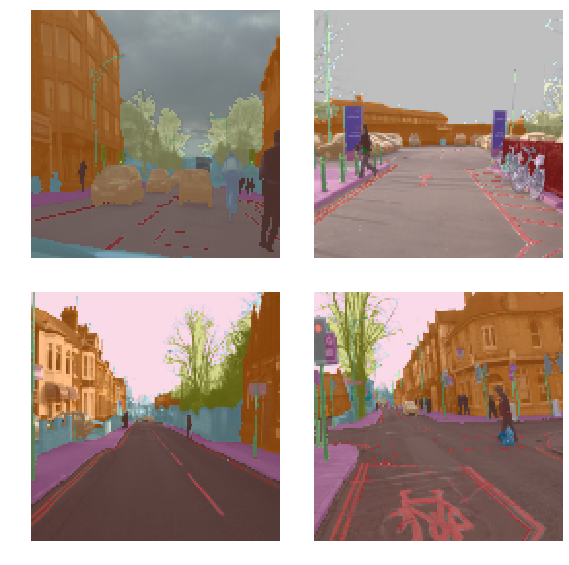

In [19]:
data.show_batch(rows=2)

In [20]:
learner = unet_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27981686.16it/s]


In [21]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


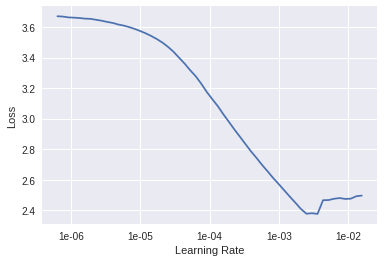

In [22]:
learner.recorder.plot()

In [23]:
from fastai.callbacks.tracker import SaveModelCallback
save_model = SaveModelCallback(learner, name='v1')
learner.fit_one_cycle(5, max_lr=3e-03, callbacks=[save_model])

epoch,train_loss,valid_loss
1,2.966722,2.488729
2,3.623736,2.349697
3,2.825051,1.567391
4,2.326759,1.459156
5,2.013095,1.329497


In [25]:
learner.fit_one_cycle(10, max_lr=1e-03, callbacks=[save_model])

epoch,train_loss,valid_loss
1,1.184982,1.347872
2,1.163558,1.209835
3,1.119672,1.092506
4,1.066219,1.048223
5,1.021897,0.978850
6,0.978330,0.909181
7,0.935616,0.842513
8,0.897379,0.842921
9,0.867064,0.807204
10,0.844278,0.804008


In [0]:
learner.save('v2')

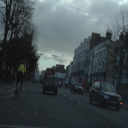

In [31]:
image = data.train_ds[0][0]
image

In [0]:
preds = learner.predict(image)

In [0]:
segment = preds[0]
mask = preds[1]

In [54]:
segment.data

tensor([[[26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         ...,
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17]]])

In [55]:
mask.data

tensor([[[26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         [26, 26, 26,  ..., 21, 21, 21],
         ...,
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17]]])

In [87]:
help(learner.predict)

Help on method predict in module fastai.basic_train:

predict(item:fastai.core.ItemBase, **kwargs) method of fastai.basic_train.Learner instance
    Return predicted class, label and probabilities for `item`.



In [86]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']
import pdb

def acc_camvid(predicted_mask_proba_batch, target_masks_batch):
    # (64, 1, 128, 128)  -> (64, 128, 128)
    target_masks_batch = target_masks_batch.squeeze(1)

    # (64, 32, 128, 128) -> (64, 128, 128)
    predicted_masks_batch = predicted_mask_proba_batch.argmax(dim=1)

    diff = predicted_masks_batch == target_masks_batch
    mask = target_masks_batch != void_code
    relevant_diff = diff[mask]
    return relevant_diff.float().mean()

learner.metrics = [acc_camvid]

#learner.validate()

[0.69130224, tensor(0.8083)]

In [73]:
acc_camvid(segment.data.unsqueeze(0), mask.unsqueeze(0))

tensor(0.)

In [77]:
save_model = SaveModelCallback(learner, name='v3')
learner.fit_one_cycle(10, max_lr=1e-03, callbacks=[save_model])

epoch,train_loss,valid_loss,acc_camvid
1,0.739332,0.817225,0.779691
2,0.735595,0.753701,0.803242
3,0.749461,0.930455,0.726545
4,0.755582,0.757039,0.780885
5,0.740458,0.691302,0.808305


KeyboardInterrupt: ignored